sys.version_info(major=3, minor=6, micro=1, releaselevel='final', serial=0)


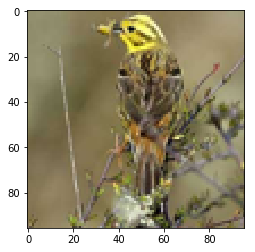

(5000, 96, 96, 3)
(5000,)


In [1]:

from __future__ import print_function

import sys
import os, sys, tarfile
import numpy as np
import matplotlib.pyplot as plt
    
if sys.version_info >= (3, 0, 0):
    import urllib.request as urllib # ugly but works
else:
    import urllib

print(sys.version_info) 

# image shape
HEIGHT = 96
WIDTH = 96
DEPTH = 3

# size of a single image in bytes
SIZE = HEIGHT * WIDTH * DEPTH

# path to the directory with the data
DATA_DIR = './data'

# url of the binary data
DATA_URL = 'http://ai.stanford.edu/~acoates/stl10/stl10_binary.tar.gz'

# path to the binary train file with image data
DATA_PATH = './data/stl10_binary/train_X.bin'

# path to the binary train file with labels
LABEL_PATH = './data/stl10_binary/train_y.bin'

def read_labels(path_to_labels):
    """
    :param path_to_labels: path to the binary file containing labels from the STL-10 dataset
    :return: an array containing the labels
    """
    with open(path_to_labels, 'rb') as f:
        labels = np.fromfile(f, dtype=np.uint8)
        return labels


def read_all_images(path_to_data):
    """
    :param path_to_data: the file containing the binary images from the STL-10 dataset
    :return: an array containing all the images
    """

    with open(path_to_data, 'rb') as f:
        # read whole file in uint8 chunks
        everything = np.fromfile(f, dtype=np.uint8)

        # We force the data into 3x96x96 chunks, since the
        # images are stored in "column-major order", meaning
        # that "the first 96*96 values are the red channel,
        # the next 96*96 are green, and the last are blue."
        # The -1 is since the size of the pictures depends
        # on the input file, and this way numpy determines
        # the size on its own.

        images = np.reshape(everything, (-1, 3, 96, 96))

        # Now transpose the images into a standard image format
        # readable by, for example, matplotlib.imshow
        # You might want to comment this line or reverse the shuffle
        # if you will use a learning algorithm like CNN, since they like
        # their channels separated.
        images = np.transpose(images, (0, 3, 2, 1))
        return images


def read_single_image(image_file):
    """
    CAREFUL! - this method uses a file as input instead of the path - so the
    position of the reader will be remembered outside of context of this method.
    :param image_file: the open file containing the images
    :return: a single image
    """
    # read a single image, count determines the number of uint8's to read
    image = np.fromfile(image_file, dtype=np.uint8, count=SIZE)
    # force into image matrix
    image = np.reshape(image, (3, 96, 96))
    # transpose to standard format
    # You might want to comment this line or reverse the shuffle
    # if you will use a learning algorithm like CNN, since they like
    # their channels separated.
    image = np.transpose(image, (2, 1, 0))
    return image


def plot_image(image):
    """
    :param image: the image to be plotted in a 3-D matrix format
    :return: None
    """
    plt.imshow(image)
    plt.show()


def download_and_extract():
    """
    Download and extract the STL-10 dataset
    :return: None
    """
    dest_directory = DATA_DIR
    if not os.path.exists(dest_directory):
        os.makedirs(dest_directory)
    filename = DATA_URL.split('/')[-1]
    filepath = os.path.join(dest_directory, filename)
    if not os.path.exists(filepath):
        def _progress(count, block_size, total_size):
            sys.stdout.write('\rDownloading %s %.2f%%' % (filename,
                float(count * block_size) / float(total_size) * 100.0))
            sys.stdout.flush()
        filepath, _ = urllib.urlretrieve(DATA_URL, filepath, reporthook=_progress)
        print('Downloaded', filename)
        tarfile.open(filepath, 'r:gz').extractall(dest_directory)

if __name__ == "__main__":
    # download data if needed
    download_and_extract()

    # test to check if the image is read correctly
    with open(DATA_PATH) as f:
        image = read_single_image(f)
        plot_image(image)

    # test to check if the whole dataset is read correctly
    images = read_all_images(DATA_PATH)
    print(images.shape)

    labels = read_labels(LABEL_PATH)
    print(labels.shape)

In [2]:
set(labels)

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10}

In [3]:
def checkcat(num):
    index_of_blank = [i for i, j in enumerate(labels) if j == num]
    plt.figure(figsize=(10, 10), dpi=80)
    ax1 = plt.subplot(161)
    ax1.imshow(images[index_of_blank[0]])
    ax2 = plt.subplot(162)
    ax2.imshow(images[index_of_blank[1]])
    ax3 = plt.subplot(163)
    ax3.imshow(images[index_of_blank[2]])
    ax4 = plt.subplot(164)
    ax4.imshow(images[index_of_blank[3]])
    ax5 = plt.subplot(165)
    ax5.imshow(images[index_of_blank[4]])
    ax6 = plt.subplot(166)
    ax6.imshow(images[index_of_blank[5]])
    plt.show()

These are images from category 1


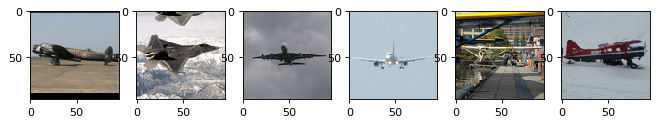

These are images from category 2


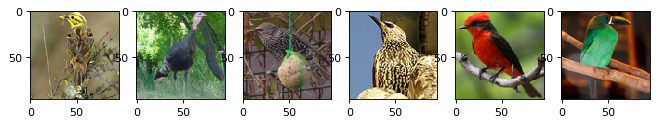

These are images from category 3


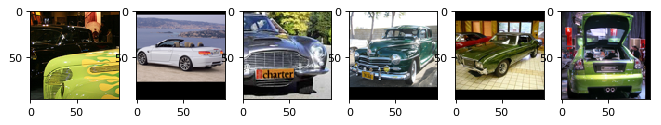

These are images from category 4


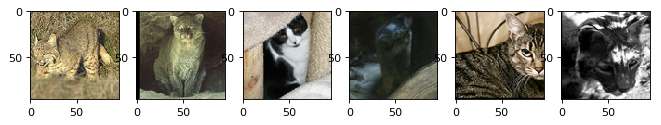

These are images from category 5


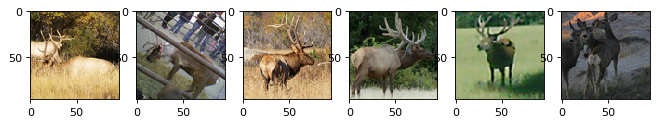

These are images from category 6


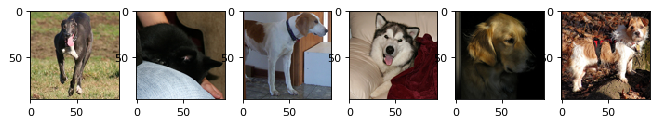

These are images from category 7


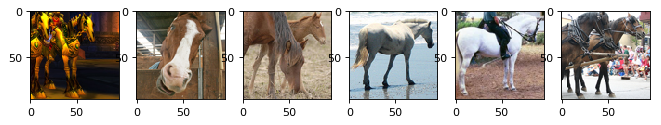

These are images from category 8


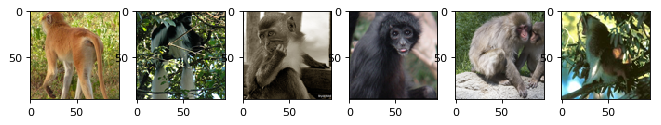

These are images from category 9


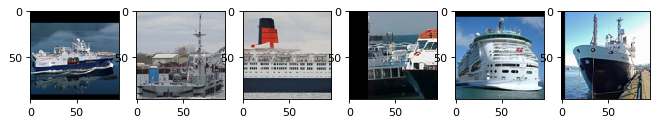

These are images from category 10


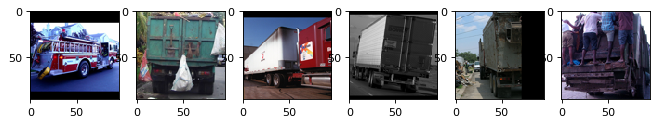

In [4]:
for i in range(1,11):
    print('These are images from category {}'.format(i))
    checkcat(i)
    

In [5]:
#Lets go with categories 2 and 3, birds and cars
index_of_birdsandcars= [i for i, j in enumerate(labels) if j in (2,3) ]
index_of_birds= [i for i, j in enumerate(labels) if j == 2 ]
index_of_cars= [i for i, j in enumerate(labels) if j == 3 ]

In [6]:
Y = np.zeros(len(images))
Y[index_of_cats] = 1

In [7]:
X_filtered = images[index_of_birdsandcars]
Y_filtered = Y[index_of_birdsandcars]

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train,  Y_test = train_test_split(X_filtered, Y_filtered, train_size = 0.8)

In [9]:
from keras.utils import np_utils
Y_train = np_utils.to_categorical(Y_train, 2)
Y_test = np_utils.to_categorical(Y_test, 2)

Using TensorFlow backend.


In [10]:
Y_train.shape

(800, 2)

In [13]:
Y_test.shape

(200, 2)

In [14]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255


print('Using real-time data augmentation.')

from keras.preprocessing.image import ImageDataGenerator
# this will do preprocessing and realtime data augmentation
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=False)  # randomly flip images

Using real-time data augmentation.


In [15]:
datagen.fit(X_train)

In [16]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.optimizers import SGD

model = Sequential()

model.add(Convolution2D(96, 3, 3, border_mode='same',
                        input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(Convolution2D(96, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Convolution2D(96, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(96, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(2))
model.add(Activation('softmax'))

/home/peter/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3), input_shape=(96, 96, 3..., padding="same")`
  if __name__ == '__main__':
/home/peter/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3))`
  # This is added back by InteractiveShellApp.init_path()
/home/peter/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3), padding="same")`
  app.launch_new_instance()
/home/peter/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3))`


In [17]:
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

In [18]:
model.fit_generator(datagen.flow(X_train, Y_train,
                        batch_size=32),
                        samples_per_epoch=X_train.shape[0],
                        nb_epoch=20,
                        validation_data=(X_test, Y_test))

/home/peter/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  """
/home/peter/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras.pre..., validation_data=(array([[[..., steps_per_epoch=25, epochs=20)`
  """


Epoch 1/20
25/25 [==============================] - 180s - loss: 0.6015 - acc: 0.6775 - val_loss: 0.5309 - val_acc: 0.7700
Epoch 2/20
25/25 [==============================] - 192s - loss: 0.4386 - acc: 0.8237 - val_loss: 0.4229 - val_acc: 0.8000
Epoch 3/20
25/25 [==============================] - 191s - loss: 0.4084 - acc: 0.8400 - val_loss: 0.3774 - val_acc: 0.8500
Epoch 4/20
25/25 [==============================] - 186s - loss: 0.3360 - acc: 0.8588 - val_loss: 0.2578 - val_acc: 0.9150
Epoch 5/20
25/25 [==============================] - 184s - loss: 0.3805 - acc: 0.8387 - val_loss: 0.3224 - val_acc: 0.8700
Epoch 6/20
25/25 [==============================] - 190s - loss: 0.2953 - acc: 0.8862 - val_loss: 0.4323 - val_acc: 0.8250
Epoch 7/20
25/25 [==============================] - 189s - loss: 0.2763 - acc: 0.8975 - val_loss: 0.2908 - val_acc: 0.8800
Epoch 8/20
25/25 [==============================] - 190s - loss: 0.2192 - acc: 0.9213 - val_loss: 0.2500 - val_acc: 0.8800
Epoch 9/20
25/25